# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [3]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as mplt
import seaborn as sb

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [6]:
df = pd.read_csv('mission_launches.csv', index_col=0)
df.drop(labels=["Unnamed: 0.1"], axis=1, inplace=True)
df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df.shape

(4324, 7)

In [ ]:
df.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 270.2+ KB


In [ ]:
df.isna().values.any()
# NaN values are in "Price"

True

In [ ]:
df.duplicated().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
# NaN values shall not be considered junk
df[df["Price"].isna()]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,IAI,"Pad 1, Palmachim Airbase, Israel",2020-07-06 01:00:00+00:00,Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",2020-05-22 07:31:00+00:00,Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China",2020-05-12 01:16:00+00:00,Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
df[df.duplicated()]
df.drop_duplicates(inplace=True)
df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Descriptive Statistics

In [9]:
df["Date"] = pd.to_datetime(df["Date"], utc=True)
df["Price"] = pd.to_numeric(df["Price"].astype("str").str.replace(",", ""), errors="coerce")
df["Rocket_Status"] = df["Rocket_Status"].astype("category")
df["Mission_Status"] = df["Mission_Status"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   category           
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 211.5+ KB


In [ ]:
df.describe()

,Price
count,963.00
mean,153.92
std,288.57
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

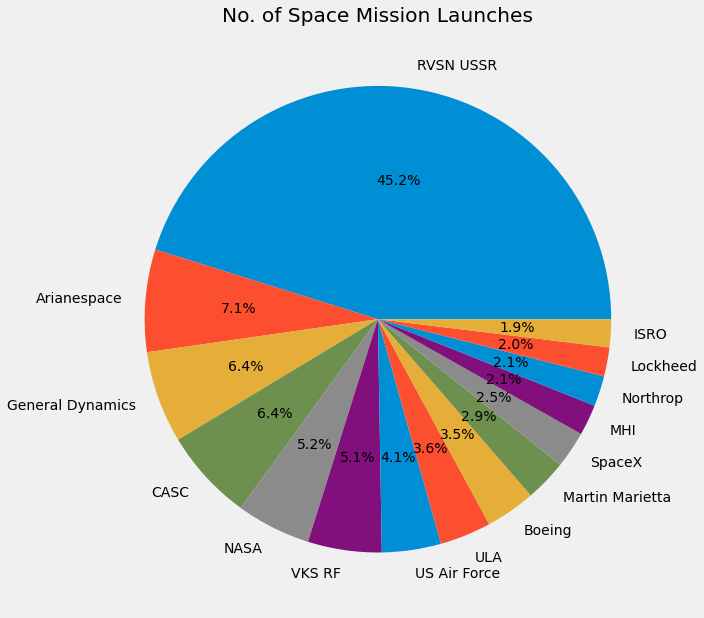

In [ ]:
mplt.style.use("fivethirtyeight")

mplt.figure(figsize=(10, 10))
mplt.pie(x=df["Organisation"].value_counts().nlargest(15), labels=df["Organisation"].value_counts().index[:15], autopct="%1.1f%%")
mplt.title("No. of Space Mission Launches")
mplt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

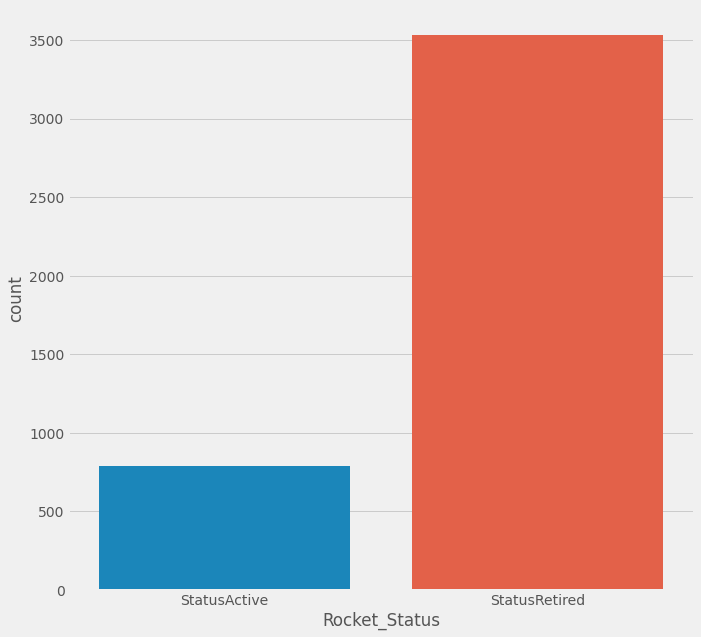

In [ ]:
mplt.figure(figsize=(10, 10))
sb.countplot(df["Rocket_Status"])
mplt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

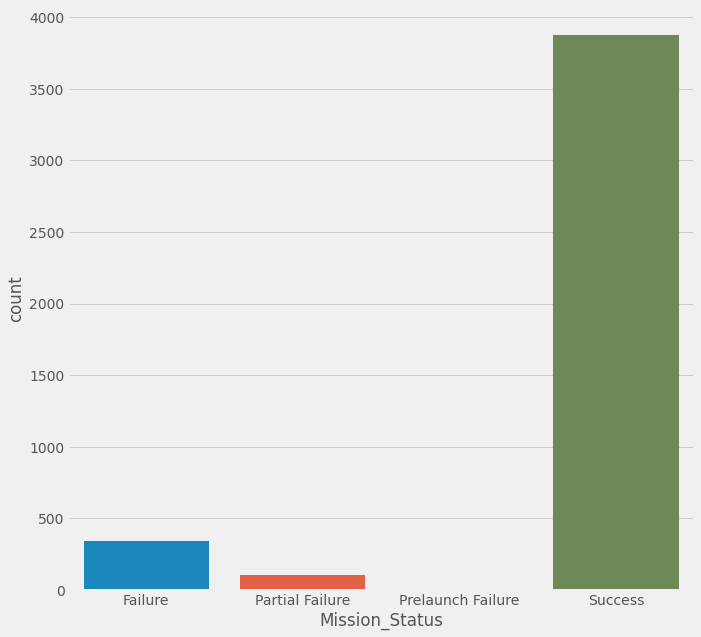

In [ ]:
mplt.figure(figsize=(10, 10))
sb.countplot(df["Mission_Status"])
mplt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

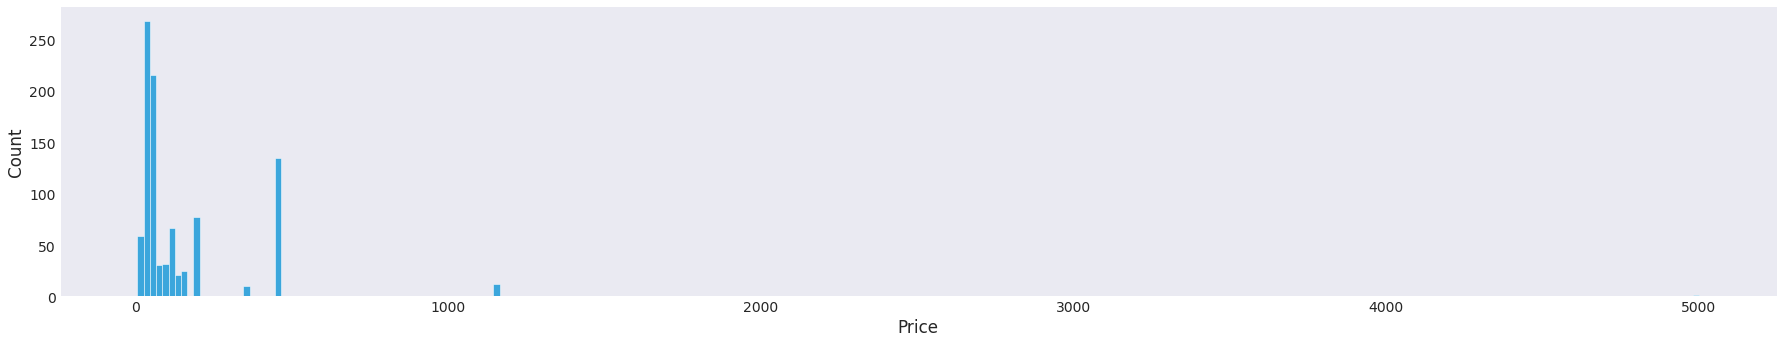

In [ ]:
with sb.axes_style("dark"):
  sb.displot(df["Price"], kind="hist", bins=250, aspect=5)
mplt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [10]:
def rename(s):
  old_names = ["Russia", "Barents Sea", "New Mexico", "Pacific Missile Range Facility", "Gran Canaria", "Yellow Sea", "Shahrud Missile Test Site", "Iran", "North Korea", "South Korea"]
  new_names = ["Russian Federation", "Russian Federation", "USA", "USA", "USA", "China", "Iran, Islamic Republic of", "Iran, Islamic Republic of", "Korea, Democratic People's Republic of", "Korea, Republic of"]
  for name in old_names:
    if name in s:
      return new_names[old_names.index(name)]
  return s.split(", ")[-1]

df.insert(1, "Country", df["Location"].map(rename))
df[df["Location"].str.contains("Shahrud Missile Test Site")]

,Organisation,Country,Location,Date,Detail,Rocket_Status,Price,Mission_Status
35,IRGC,"Iran, Islamic Republic of","Launch Plateform, Shahrud Missile Test Site",2020-04-22 03:59:00+00:00,Qased | Noor 1,StatusActive,NaN,Success


In [11]:
def get_isocode(s):
  try:
    return countries.get(s)[2]
  except KeyError:
    return np.nan

df.insert(2, "ISO", df["Country"].map(get_isocode))
df[df["Country"] == "Pacific Ocean"].head()

,Organisation,Country,ISO,Location,Date,Detail,Rocket_Status,Price,Mission_Status
556,Sea Launch,Pacific Ocean,NaN,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean",2014-05-24 21:09:00+00:00,Zenit-3 SL | Eutelsat-3B,StatusActive,NaN,Success
617,Sea Launch,Pacific Ocean,NaN,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean",2013-02-01 06:55:00+00:00,Zenit-3 SL | Intelsat-27,StatusActive,NaN,Failure
625,Sea Launch,Pacific Ocean,NaN,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean",2012-12-03 20:43:00+00:00,Zenit-3 SL | Eutelsat-70B,StatusActive,NaN,Success
636,Sea Launch,Pacific Ocean,NaN,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean",2012-08-19 06:54:00+00:00,Zenit-3 SL | Intelsat-21,StatusActive,NaN,Success
645,Sea Launch,Pacific Ocean,NaN,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean",2012-06-01 05:22:00+00:00,Zenit-3 SL | Intelsat-19,StatusActive,NaN,Success


In [ ]:
px.choropleth(locations=df["ISO"].value_counts().index, color=df["Country"].value_counts().drop("Pacific Ocean"), title="No. of Launches by Country", color_continuous_scale="matter")

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
px.choropleth(locations=df[df["Mission_Status"] == "Failure"]["ISO"].value_counts().index, color=df[df["Mission_Status"] == "Failure"]["Country"].value_counts().drop("Pacific Ocean"), title="No. of Failed Launches by Country", color_continuous_scale="matter")

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
px.sunburst(df, path=["Country", "Organisation"], color="Mission_Status", color_discrete_map={'(?)':'darkblue', 'Success':'gold', 'Failure':'black'}, title="Mission Status by Country and Organisation")

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df.groupby(by=["Organisation"])["Price"].sum().sort_values(ascending=False)

Organisation
NASA               76,280.00
Arianespace        16,345.00
ULA                14,798.00
RVSN USSR          10,000.00
CASC                6,310.51
SpaceX              5,444.00
Northrop            3,930.00
MHI                 3,532.50
ISRO                2,177.00
US Air Force        1,550.92
VKS RF              1,548.90
ILS                 1,320.00
Boeing              1,241.00
Roscosmos           1,187.50
Martin Marietta       721.40
Kosmotras             638.00
Eurockot              543.40
Lockheed              280.00
JAXA                  168.00
Rocket Lab             97.50
ESA                    37.00
ExPace                 28.30
EER                    20.00
Sandia                 15.00
Virgin Orbit           12.00
SRC                     0.00
Yuzhmash                0.00
RAE                     0.00
OneSpace                0.00
OKB-586                 0.00
US Navy                 0.00
Sea Launch              0.00
UT                      0.00
Starsem                 0.00
A

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
df.groupby(by=["Organisation"])["Price"].mean().dropna()

Organisation
Arianespace         170.26
Boeing              177.29
CASC                 40.19
EER                  20.00
ESA                  37.00
Eurockot             41.80
ExPace               28.30
ILS                 101.54
ISRO                 32.49
JAXA                 56.00
Kosmotras            29.00
Lockheed             35.00
MHI                  95.47
Martin Marietta      80.16
NASA                511.95
Northrop             47.35
RVSN USSR         5,000.00
Rocket Lab            7.50
Roscosmos            51.63
Sandia               15.00
SpaceX               54.99
ULA                 151.00
US Air Force         59.65
VKS RF               46.94
Virgin Orbit         12.00
Name: Price, dtype: float64

# Chart the Number of Launches per Year

In [ ]:
df["Date"].dt.year.value_counts().sort_index()

1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Date, Length: 64, dtype: int64

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
df["Date"].dt.month.value_counts()

12    450
6     402
4     383
10    381
8     373
9     365
3     353
7     351
2     336
11    335
5     326
1     268
Name: Date, dtype: int64

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
df["Month"] = df["Date"].dt.month
df.groupby(by="Mission_Status")["Month"].value_counts()

# Most popular is December
# Most successes is also December, while June has most failures

Mission_Status     Month
Failure            6         36
                   8         32
                   4         31
                   11        31
                   2         30
                   7         28
                   9         28
                   10        28
                   12        26
                   3         25
                   5         25
                   1         19
Partial Failure    12        19
                   6         10
                   9          9
                   1          8
                   4          8
                   7          8
                   8          8
                   2          7
                   10         7
                   3          6
                   5          6
                   11         6
Prelaunch Failure  8          2
                   9          1
                   12         1
Success            12       404
                   6        356
                   10       346
               

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

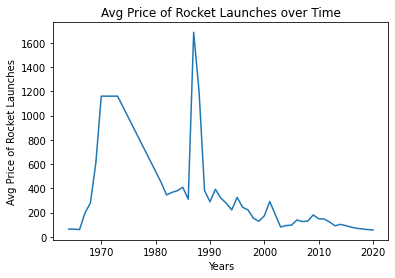

In [12]:
# df["Year"] = df["Date"].dt.year
mplt.plot(df.groupby(by="Year")["Price"].mean().dropna())
mplt.xlabel("Years")
mplt.ylabel("Avg Price of Rocket Launches")
mplt.title("Avg Price of Rocket Launches over Time")
mplt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [19]:
df.groupby(by=["Year"])["Organisation"].value_counts()

Year  Organisation
1957  RVSN USSR        2
      US Navy          1
1958  US Navy         12
      AMBA             7
      RVSN USSR        5
                      ..
2020  IAI              1
      IRGC             1
      ISA              1
      JAXA             1
      Virgin Orbit     1
Name: Organisation, Length: 663, dtype: int64

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [35]:
rvsn_ussr = df[(df["Organisation"] == "RVSN USSR") & (df["Year"] <= 1991)]
rvsn_ussr

,Organisation,Country,ISO,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
1718,RVSN USSR,Kazakhstan,KAZ,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,1991
1723,RVSN USSR,Russian Federation,RUS,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,1991
1725,RVSN USSR,Russian Federation,RUS,"Site 32/1, Plesetsk Cosmodrome, Russia",1991-11-12 20:09:00+00:00,Tsyklon-3 | Cosmos 2165 to 2170,StatusRetired,NaN,Success,1991
1728,RVSN USSR,Russian Federation,RUS,"Site 132/1, Plesetsk Cosmodrome, Russia",1991-10-10 14:00:00+00:00,Cosmos-3M (11K65M) | Cosmos 2164,StatusRetired,NaN,Success,1991
1729,RVSN USSR,Russian Federation,RUS,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-09-28 07:05:00+00:00,Tsyklon-3 | Cosmos 2157 to 2162,StatusRetired,NaN,Success,1991
...,...,...,...,...,...,...,...,...,...,...
4301,RVSN USSR,Kazakhstan,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-09-23 07:40:00+00:00,Vostok | E-1 n†­1 (Luna-1),StatusRetired,NaN,Failure,1958
4313,RVSN USSR,Kazakhstan,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15 07:12:00+00:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,1958
4315,RVSN USSR,Kazakhstan,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,1958
4322,RVSN USSR,Kazakhstan,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957


In [36]:
usa = df[(df["Country"] == "USA") & (df["Year"] <= 1991)]
usa

,Organisation,Country,ISO,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
1721,General Dynamics,USA,USA,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,1991
1722,General Dynamics,USA,USA,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,1991
1724,NASA,USA,USA,"LC-39A, Kennedy Space Center, Florida, USA",1991-11-24 23:44:00+00:00,Space Shuttle Atlantis | STS-44,StatusRetired,450.00,Success,1991
1726,Martin Marietta,USA,USA,"SLC-4E, Vandenberg AFB, California, USA",1991-11-08 07:07:00+00:00,Titan IV(403)A | SLDCOM & NOSS 3x,StatusRetired,NaN,Success,1991
1732,NASA,USA,USA,"LC-39A, Kennedy Space Center, Florida, USA",1991-09-12 23:11:00+00:00,Space Shuttle Discovery | STS-48,StatusRetired,450.00,Success,1991
...,...,...,...,...,...,...,...,...,...,...
4317,US Navy,USA,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17 12:15:00+00:00,Vanguard | Vanguard 1,StatusRetired,NaN,Success,1958
4318,AMBA,USA,USA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00+00:00,Juno I | Explorer 2,StatusRetired,NaN,Failure,1958
4319,US Navy,USA,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958
4320,AMBA,USA,USA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1958


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [39]:
cold_war_df = pd.concat([rvsn_ussr, usa], axis=0, ignore_index=True, join="outer")
cold_war_df

,Organisation,Country,ISO,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
0,RVSN USSR,Kazakhstan,KAZ,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,1991
1,RVSN USSR,Russian Federation,RUS,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,1991
2,RVSN USSR,Russian Federation,RUS,"Site 32/1, Plesetsk Cosmodrome, Russia",1991-11-12 20:09:00+00:00,Tsyklon-3 | Cosmos 2165 to 2170,StatusRetired,NaN,Success,1991
3,RVSN USSR,Russian Federation,RUS,"Site 132/1, Plesetsk Cosmodrome, Russia",1991-10-10 14:00:00+00:00,Cosmos-3M (11K65M) | Cosmos 2164,StatusRetired,NaN,Success,1991
4,RVSN USSR,Russian Federation,RUS,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-09-28 07:05:00+00:00,Tsyklon-3 | Cosmos 2157 to 2162,StatusRetired,NaN,Success,1991
...,...,...,...,...,...,...,...,...,...,...
2422,US Navy,USA,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17 12:15:00+00:00,Vanguard | Vanguard 1,StatusRetired,NaN,Success,1958
2423,AMBA,USA,USA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00+00:00,Juno I | Explorer 2,StatusRetired,NaN,Failure,1958
2424,US Navy,USA,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958
2425,AMBA,USA,USA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1958


In [58]:
px.pie(values=cold_war_df["Organisation"].value_counts(), names=cold_war_df["Organisation"].value_counts().index, color=cold_war_df["Organisation"].value_counts().index)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

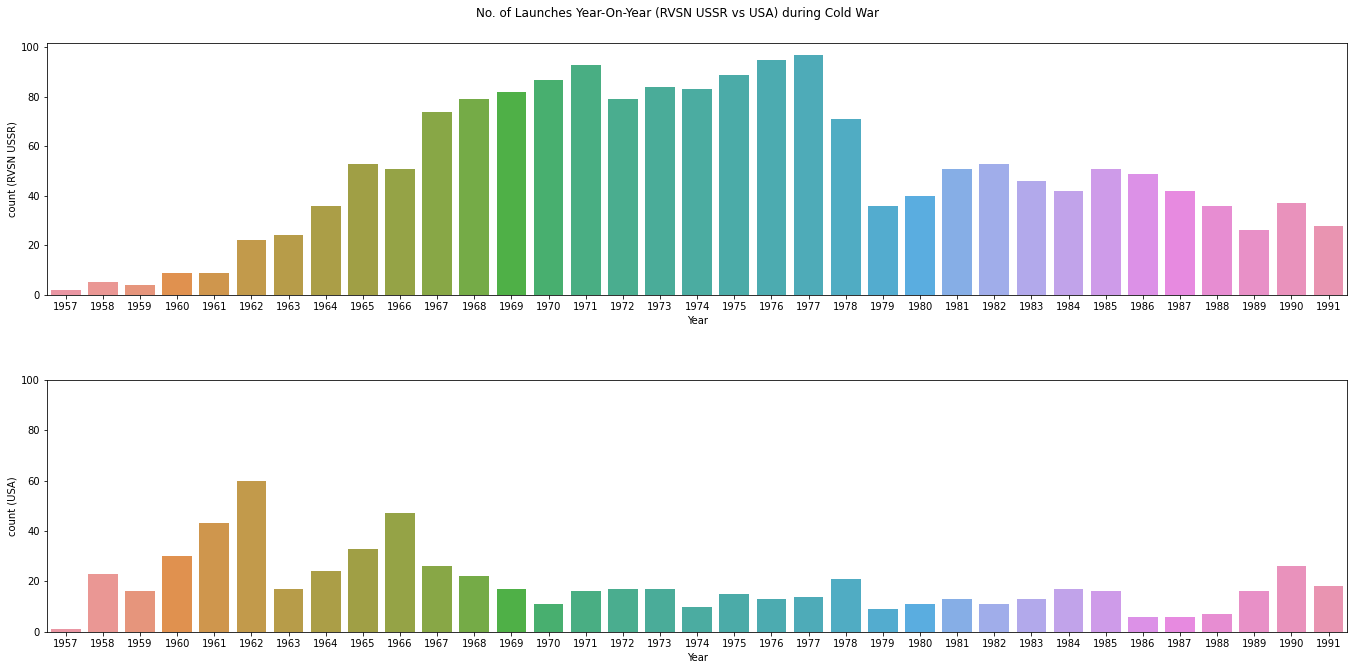

In [83]:
mplt.figure(figsize=(20, 10))

mplt.subplot(2, 1, 1)
sb.countplot(x=cold_war_df[cold_war_df["Organisation"] == "RVSN USSR"]["Year"])
mplt.ylabel("count (RVSN USSR)")

mplt.subplot(2, 1, 2)
sb.countplot(x=cold_war_df[cold_war_df["Country"] == "USA"]["Year"])
mplt.ylabel("count (USA)")
mplt.ylim(0, 100)

mplt.suptitle("No. of Launches Year-On-Year (RVSN USSR vs USA) during Cold War")
mplt.tight_layout(pad=5)
mplt.show()

## Chart the Total Number of Mission Failures Year on Year.

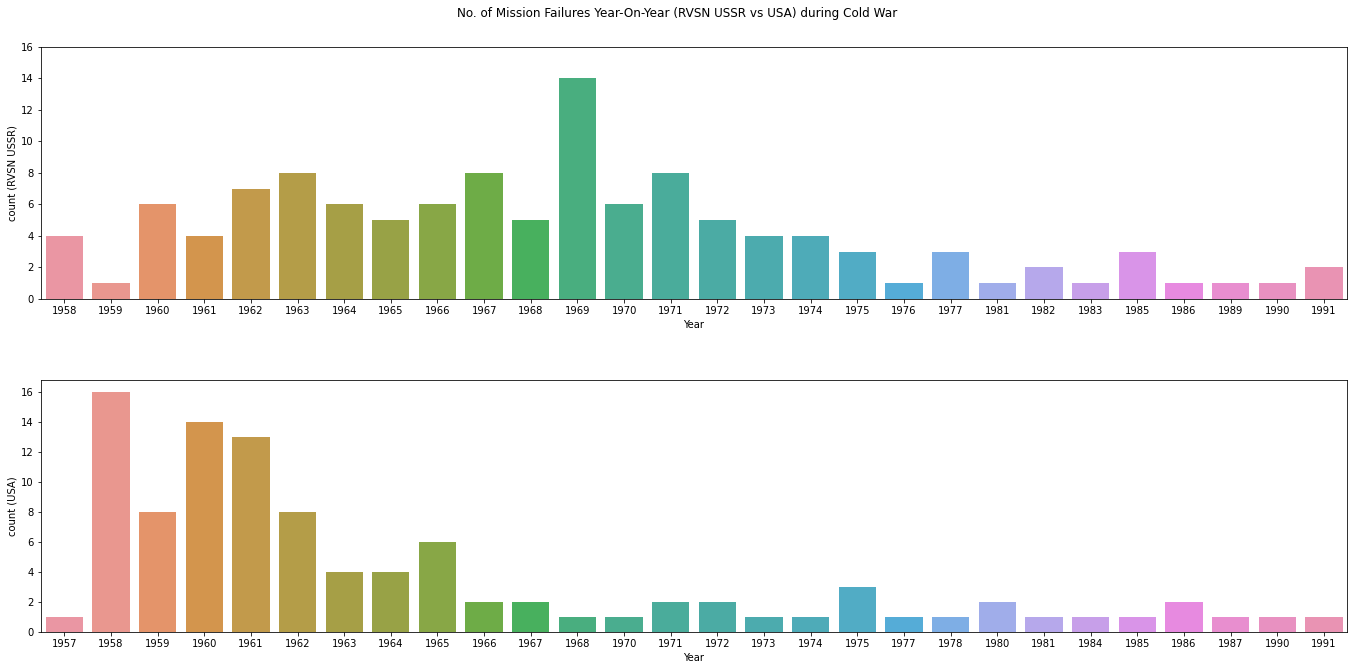

In [84]:
mplt.figure(figsize=(20, 10))

mplt.subplot(2, 1, 1)
sb.countplot(x=cold_war_df[(cold_war_df["Organisation"] == "RVSN USSR") & (cold_war_df["Mission_Status"] == "Failure")]["Year"])
mplt.ylabel("count (RVSN USSR)")
mplt.ylim(0, 16)

mplt.subplot(2, 1, 2)
sb.countplot(x=cold_war_df[(cold_war_df["Country"] == "USA") & (cold_war_df["Mission_Status"] == "Failure")]["Year"])
mplt.ylabel("count (USA)")

mplt.suptitle("No. of Mission Failures Year-On-Year (RVSN USSR vs USA) during Cold War")
mplt.tight_layout(pad=5)
mplt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [103]:
df.groupby(by=["Year"])["Country"].value_counts()

Year  Country                  
1957  Kazakhstan                    2
      USA                           1
1958  USA                          23
      Kazakhstan                    5
1959  USA                          16
                                   ..
2020  New Zealand                   3
      Russian Federation            3
      France                        2
      Iran, Islamic Republic of     2
      Israel                        1
Name: Country, Length: 427, dtype: int64

In [89]:
df.groupby(by=["Year", "Mission_Status"])["Country"].value_counts()

Year  Mission_Status   Country                  
1957  Failure          USA                           1
      Success          Kazakhstan                    2
1958  Failure          USA                          16
                       Kazakhstan                    4
      Partial Failure  USA                           2
                                                    ..
2020  Success          Russian Federation            3
                       France                        2
                       New Zealand                   2
                       Iran, Islamic Republic of     1
                       Israel                        1
Name: Country, Length: 632, dtype: int64

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [104]:
df[df["Year"].between(1970, 1981)]["Organisation"].value_counts()

RVSN USSR           905
General Dynamics     69
Martin Marietta      59
US Air Force         27
CASC                 17
ISAS                 13
NASA                 12
MHI                   8
CNES                  8
ASI                   7
ESA                   4
ISRO                  3
CECLES                2
RAE                   2
Roscosmos             1
UT                    1
Name: Organisation, dtype: int64

In [105]:
df[df["Year"] == 2018]["Organisation"].value_counts()

CASC           37
SpaceX         21
Roscosmos      11
Arianespace    11
ULA             8
ISRO            7
VKS RF          5
MHI             4
Rocket Lab      3
Northrop        2
Blue Origin     2
JAXA            2
Landspace       1
ExPace          1
Exos            1
Eurockot        1
Name: Organisation, dtype: int64

In [106]:
df[df["Year"] == 2019]["Organisation"].value_counts()

CASC           27
Roscosmos      13
SpaceX         13
Arianespace     9
VKS RF          8
ISRO            6
Rocket Lab      6
ExPace          5
ULA             5
Blue Origin     3
Northrop        3
Exos            3
ISA             3
ILS             1
MHI             1
i-Space         1
OneSpace        1
JAXA            1
Name: Organisation, dtype: int64

In [108]:
df[df["Year"] == 2020]["Organisation"].value_counts()

CASC            19
SpaceX          14
Roscosmos        4
ULA              4
Arianespace      4
ExPace           3
Rocket Lab       3
VKS RF           3
Northrop         2
MHI              2
JAXA             1
IAI              1
Virgin Orbit     1
IRGC             1
ISA              1
Name: Organisation, dtype: int64